In [1]:
import pandas as pd
import sys
sys.path.append('../utils')
import visualization as visualization
import generic as generic
import project_utils as project_utils
import numpy as np
import matplotlib.pyplot as plt
import importlib



pygame 2.6.1 (SDL 2.28.4, Python 3.11.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Constants

In [2]:
epidemic_years = ['2012_13', '2015_16', '2018_19', '2023_24']

### Load Data

In [3]:
dengue_data = pd.read_csv('../data/correlation/dengue_data_with_coordinates.csv')
ovitraps_data = pd.read_csv('../data/correlation/ovitraps_data_with_coordinates.csv')


### Process Data

In [11]:
# Dengue data
weekly_dengue_data = project_utils.get_weekly_dengue(dengue_data)
daily_dengue_cases = project_utils.get_daily_dengue(dengue_data)

# ovitraps data
weekly_ovitraps = project_utils.get_weekly_ovitraps(ovitraps_data)
weekly_ovitraps_sum = weekly_ovitraps.sum(axis=1)
weekly_ovitraps_mean = weekly_ovitraps.mean(axis=1)



### Plot data

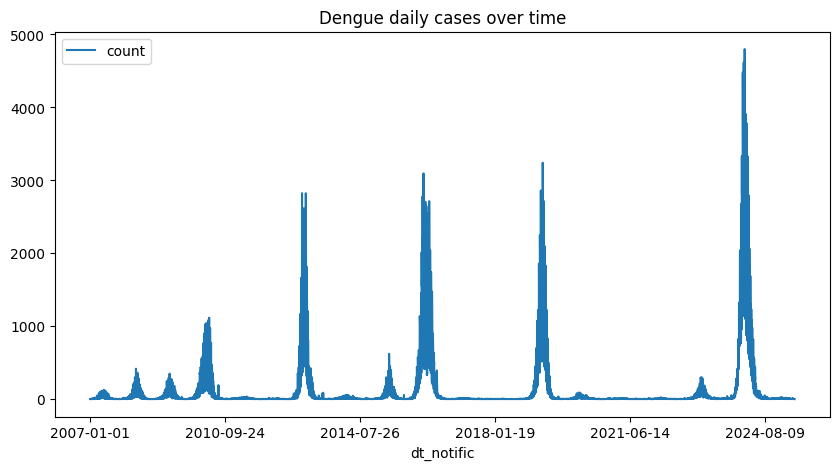

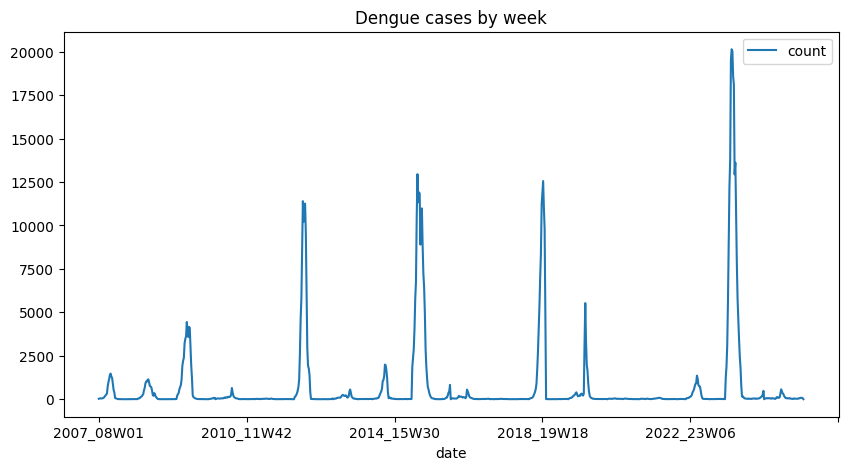

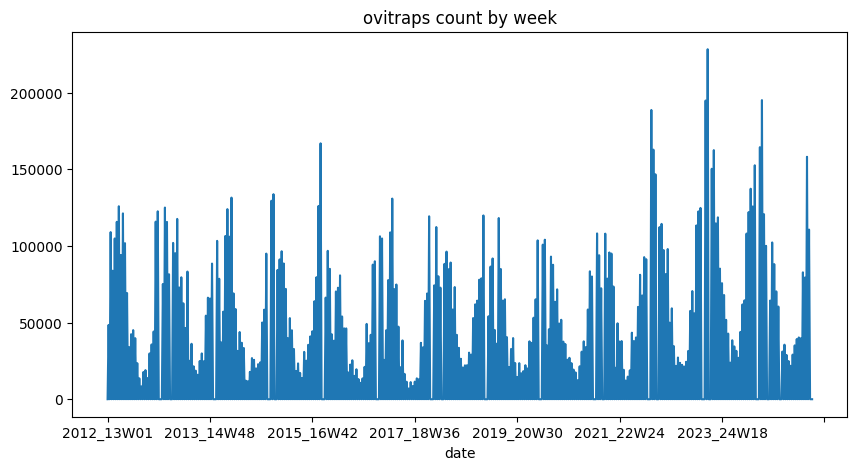

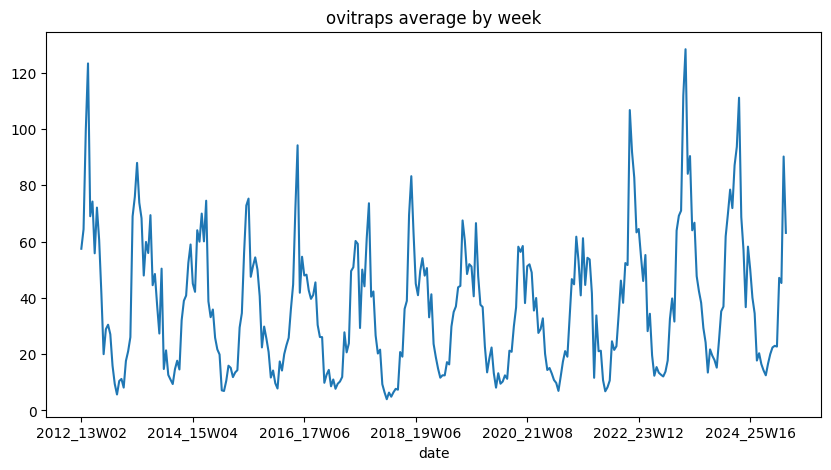

In [12]:
daily_dengue_cases.plot(kind='line', figsize=(10, 5), title='Dengue daily cases over time')
plt.show()
weekly_dengue_data.plot(kind='line', figsize=(10, 5), title='Dengue cases by week')
plt.show()
weekly_ovitraps_sum.plot(kind='line', figsize=(10, 5), title='ovitraps count by week')
plt.show()
weekly_ovitraps_mean.dropna().plot(kind='line', figsize=(10, 5), title='ovitraps average by week')
plt.show()


# Correlation Analysis

### All years

In [100]:
importlib.reload(project_utils)
importlib.reload(generic)
generic.windowed_correlation(series_1=weekly_ovitraps_mean,
    series_2=weekly_ovitraps_mean,
    max_lag=50,)

Windowed Series 1 Length: 1      0.868679
3      1.161512
5      2.643343
7      3.648063
9      1.356039
         ...   
624    1.054902
626    1.389649
628    1.755595
630    1.478280
632    2.120277
Name: 0, Length: 294, dtype: float64. Windowed Series 2 Length: 1      0.868679
3      1.161512
5      2.643343
7      3.648063
9      1.356039
         ...   
624    1.054902
626    1.389649
628    1.755595
630    1.478280
632    2.120277
Name: 1, Length: 294, dtype: float64
Windowed Series 1 Length: 1      0.868679
3      1.161512
5      2.643343
7      3.648063
9      1.356039
         ...   
624    1.054902
626    1.389649
628    1.755595
630    1.478280
632    2.120277
Name: 0, Length: 294, dtype: float64. Windowed Series 2 Length: 1      0.868679
3      1.161512
5      2.643343
7      3.648063
9      1.356039
         ...   
624    1.054902
626    1.389649
628    1.755595
630    1.478280
632    2.120277
Name: 1, Length: 294, dtype: float64
Windowed Series 1 Length: 1      0.868679


{-50: 292.9999999999998,
 -49: 292.9999999999998,
 -48: 292.9999999999998,
 -47: 294.0,
 -46: 294.0,
 -45: 295.0,
 -44: 295.0,
 -43: 296.00000000000034,
 -42: 296.00000000000034,
 -41: 297.00000000000006,
 -40: 297.00000000000006,
 -39: 297.00000000000006,
 -38: 297.00000000000006,
 -37: 297.9999999999998,
 -36: 297.9999999999998,
 -35: 299.0000000000005,
 -34: 299.0000000000005,
 -33: 300.0000000000001,
 -32: 300.0000000000001,
 -31: 300.9999999999998,
 -30: 300.9999999999998,
 -29: 302.00000000000017,
 -28: 302.00000000000017,
 -27: 302.00000000000017,
 -26: 302.00000000000017,
 -25: 302.99999999999983,
 -24: 302.99999999999983,
 -23: 304.0000000000001,
 -22: 304.0000000000001,
 -21: 304.99999999999966,
 -20: 304.99999999999966,
 -19: 306.0000000000001,
 -18: 306.0000000000001,
 -17: 306.9999999999998,
 -16: 306.9999999999998,
 -15: 308.00000000000006,
 -14: 308.00000000000006,
 -13: 309.0000000000002,
 -12: 309.0000000000002,
 -11: 310.00000000000006,
 -10: 310.00000000000006,
 -9: 

In [88]:
series_1 = weekly_ovitraps_mean
series_2 = weekly_dengue_data['count']
last_valid_index = None  # Set to None to use the last valid index of the series
window_size = None  # Set to None to use the smaller series length

# Drop both indexes to ensure they are aligned
series_1.reset_index(drop=True, inplace=True)
series_2.reset_index(drop=True, inplace=True)

# Get the last valid index if not provided
if last_valid_index is None:
    last_valid_index = min(
        series_1.last_valid_index(), series_2.last_valid_index()
    )

# Use the smaller series length if window_size is not provided
if window_size is None:
    window_size = min(len(series_1), len(series_2),last_valid_index)

    # series_2 is shifted backward (leading series)
windowed_series_1 = series_1[
    last_valid_index - window_size : last_valid_index
]
windowed_series_2 = series_2[
    last_valid_index - window_size -1 : last_valid_index
    -1
]

0

In [82]:
corr = generic.calculate_correlation(
            windowed_series_1,
            windowed_series_2,

        )

ValueError: The two series must have the same length to calculate                  correlation.

In [70]:
windowed_series_1

0            NaN
1      57.438389
2            NaN
3      64.374852
4            NaN
         ...    
680          NaN
681    45.262108
682          NaN
683    90.197834
684          NaN
Length: 685, dtype: float64

In [42]:
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data,
    window_lengths = [None],
    max_lag =  50,
    )

TypeError: unsupported operand type(s) for -: 'str' and 'Timedelta'

In [41]:
importlib.reload(generic)
generic.calculate_correlation(series_1= weekly_ovitraps_mean[-100:],
                              series_2= weekly_dengue_data['count'][-100:],)

0.35038581364690646

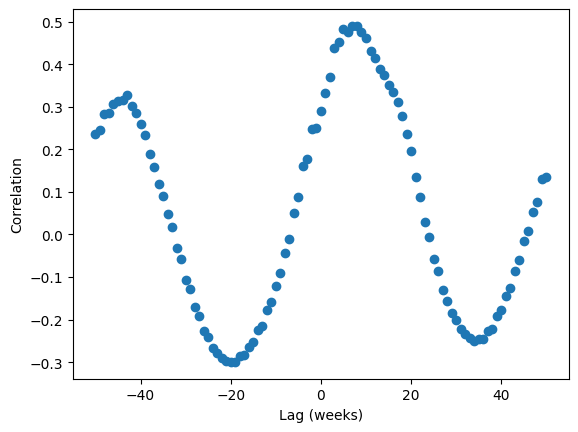

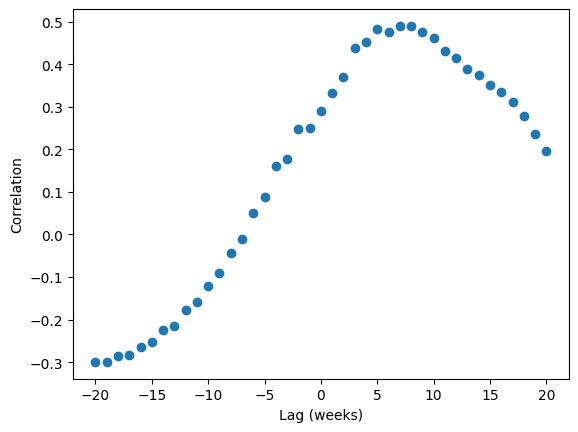

Maximum correlation: 0.48982835638883515
Maximum correlation lag: 7


In [ ]:
# Define max lag (e.g., ±4 weeks)
max_lag = 50
results = {}

for lag in range(-max_lag, max_lag + 1):
    if lag < 0:
        shifted = corr_df['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean ahead
    else:
        shifted = corr_df['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean behind

    corr = corr_df['dengue_cases'].corr(shifted)
    results[lag] = corr

plt.scatter(results.keys(), results.values())
plt.ylabel('Correlation')
plt.xlabel('Lag (weeks)')
plt.show()


max_lag = 20
results = {}

for lag in range(-max_lag, max_lag + 1):
    if lag < 0:
        shifted = corr_df['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean ahead
    else:
        shifted = corr_df['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean behind

    corr = corr_df['dengue_cases'].corr(shifted)
    results[lag] = corr

plt.scatter(results.keys(), results.values())
plt.ylabel('Correlation')
plt.xlabel('Lag (weeks)')
plt.show()

print(f'Maximum correlation: {max(results.values())}')
print(f'Maximum correlation lag: {max(results, key=results.get)}')

### Epidemic years


In [ ]:
epid_corr = {}
for year in epidemic_years:
    # filter the data for the specific epidemic year
    b_year = int(year[:4])
    e_year = b_year + 1
    epid_index = [(b_year, week) for week in range(30, 53)]
    epid_index += [(e_year, week) for week in range(1, 30)]
    epid_data = corr_df.loc[epid_index]

    # get the maximum correlation for the epidemic year
    max_lag = 5
    epid_results = {}

    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            shifted = epid_data['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean ahead
        else:
            shifted = epid_data['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean behind

        corr = epid_data['dengue_cases'].corr(shifted)
        epid_results[lag] = corr
    
    epid_corr[year] = (max(epid_results, key=epid_results.get), max(epid_results.values()))

epid_corr
    


{'2012_13': (5, 0.7442796467678748),
 '2015_16': (5, 0.6641296574831214),
 '2018_19': (5, 0.31414031372852563),
 '2023_24': (5, 0.813499644387126)}

### Non epidemic years

In [ ]:
n_epid_corr = {}
for year in ovitraps_data['anoepid'].unique():
    if year in epidemic_years or year == '2024_25' or year == '2011_12':
        continue
    b_year = int(year[:4])
    e_year = b_year + 1
    n_epid_index = [(b_year, week) for week in range(30, 53)]
    n_epid_index += [(e_year, week) for week in range(1, 30)]
    n_epid_data = corr_df.loc[n_epid_index]


    max_lag = 5
    nepid_results = {}

    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            shifted = n_epid_data['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean ahead
        else:
            shifted = n_epid_data['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean behind

        corr = n_epid_data['dengue_cases'].corr(shifted)
        nepid_results[lag] = corr
    
    n_epid_corr[year] = (max(nepid_results, key=nepid_results.get), max(nepid_results.values()))

n_epid_corr
    


{'2013_14': (5, 0.719105712420718),
 '2021_22': (4, 0.4863310167402678),
 '2016_17': (1, 0.7592493933683144),
 '2019_20': (5, 0.7448622770311791),
 '2020_21': (0, 0.8039149670721912),
 '2022_23': (5, 0.44126271370211156),
 '2017_18': (1, 0.6301594613694329),
 '2014_15': (4, 0.6989099881380151)}

In [21]:
all_years_corr = {**epid_corr, **n_epid_corr}
# sort the dictionary by year
all_years_corr = dict(sorted(all_years_corr.items(), key=lambda item: item[0]))

### Final Analysis

In [22]:
epid_corr_mean = np.mean([v[1] for v in epid_corr.values()])
n_epid_corr_mean = np.mean([v[1] for v in n_epid_corr.values()])
all_years_mean = np.mean([v[1] for v in all_years_corr.values()])
print(f'Epidemic years correlation mean: {epid_corr_mean}')
print(f'Non epidemic years correlation mean: {n_epid_corr_mean}')
print(f'All years correlation mean: {all_years_mean}')


Epidemic years correlation mean: 0.6340123155916619
Non epidemic years correlation mean: 0.6604744412302788
All years correlation mean: 0.6516537326840731


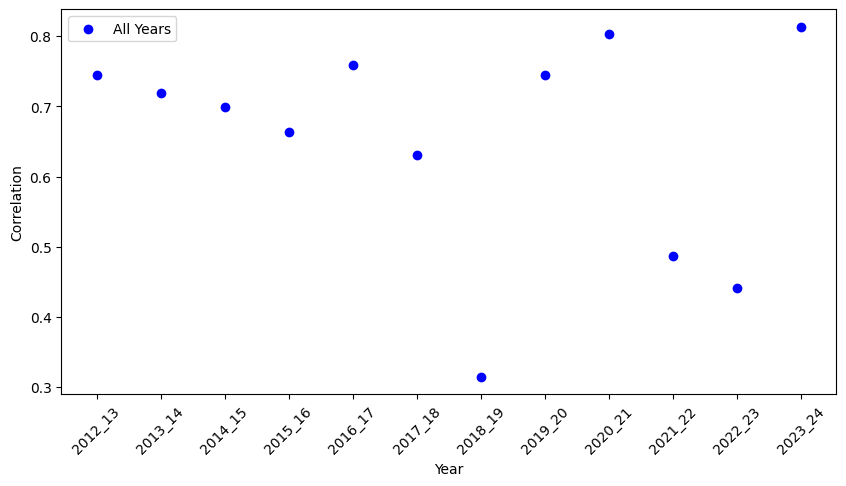

In [23]:
# Plot of all year correlations
plt.figure(figsize=(10, 5))
plt.scatter(all_years_corr.keys(), [v[1] for v in all_years_corr.values()], color='blue', label='All Years')
plt.ylabel('Correlation')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend()


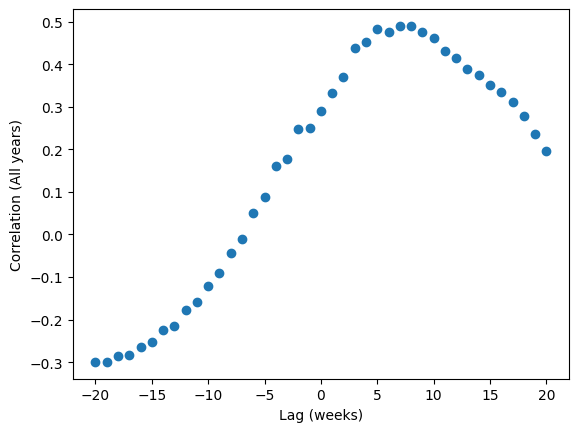

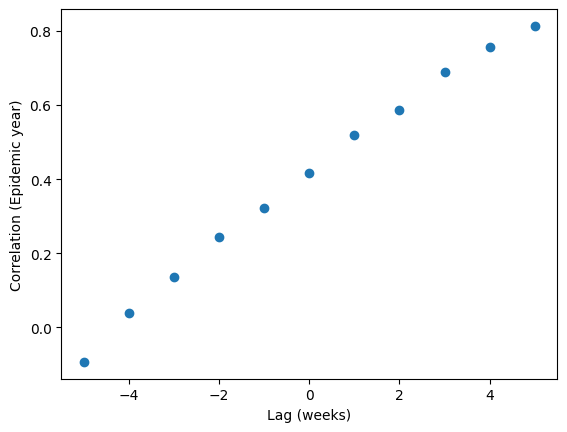

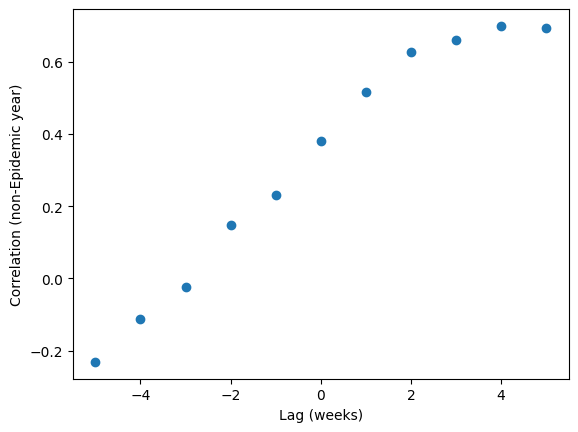

In [24]:
plt.scatter(results.keys(), results.values())
plt.ylabel('Correlation (All years)')
plt.xlabel('Lag (weeks)')
plt.show()
plt.scatter(epid_results.keys(), epid_results.values())
plt.ylabel('Correlation (Epidemic year)')
plt.xlabel('Lag (weeks)')
plt.show()
plt.scatter(nepid_results.keys(), nepid_results.values())
plt.ylabel('Correlation (non-Epidemic year)')       
plt.xlabel('Lag (weeks)')
plt.show()

In [ ]:
corr_2018 = {}
for year in ['2018_19']:
    # filter the data for the specific epidemic year
    b_year = int(year[:4])
    e_year = b_year + 1
    index_2018 = [(b_year, week) for week in range(30, 53)]
    index_2018 += [(e_year, week) for week in range(1, 30)]
    data_2018 = corr_df.loc[index_2018]

    # get the maximum correlation for the epidemic year
    max_lag = 20
    results_2018 = {}

    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            shifted = data_2018['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean ahead
        else:
            shifted = data_2018['ovitraps_mean'].shift(periods=lag)  # ovitraps_mean behind

        corr = data_2018['dengue_cases'].corr(shifted)
        results_2018[lag] = corr
    
    corr_2018[year] = (max(results_2018, key=results_2018.get), max(results_2018.values()))

corr_2018
    


{'2018_19': (18, 0.9333985190720447)}

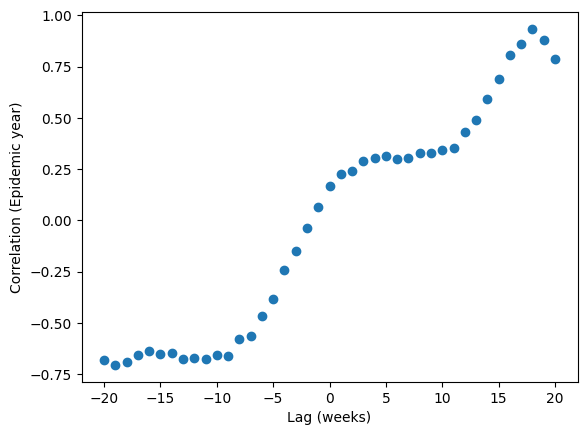

In [26]:
plt.scatter(results_2018.keys(), results_2018.values())
plt.ylabel('Correlation (Epidemic year)')   
plt.xlabel('Lag (weeks)')
plt.show()
